In [21]:
import cv2
import numpy as np
pre_img = cv2.imread('53-10.tif')
#pre_img = cv2.imread('36-32.tif')
#pre_img =cv2.imread('1-52.tif')
print(pre_img.shape) 

inputImageGray = cv2.cvtColor(pre_img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(inputImageGray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
  
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(7, 7))

dilated = cv2.dilate(inputImageGray, kernel)

horizontal = np.copy(bw)
vertical = np.copy(bw)

cols = horizontal.shape[1]

horizontal_size = cols // 30
print(horizontal_size)
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (7,1))
# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)



rows = vertical.shape[0]
verticalsize = rows // 30
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 828))
# Apply morphology operations
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)
# Show extracted vertical lines

vertical = cv2.bitwise_not(horizontal)
# Step 1
edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 3, -2)
# show_wait_destroy("edges", edges)
# # Step 2
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel)
# show_wait_destroy("dilate", edges)
# # Step 3
smooth = np.copy(vertical)
# # Step 4
# smooth = cv.blur(smooth, (2, 2))
# # Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
# # Show final result


# cv2.imshow('input', bw)
# cv2.imshow('output', vertical)
# # plt.imshow(inputImageGray)

# # plt.show()
# # plt.imshow(dilated)
# # plt.show()
# cv2.waitKey(0)

(503, 828, 3)
27


In [385]:
# Standard imports
import cv2
import numpy as np;

# Read image
im = cv2.imread("53-10.tif", cv2.IMREAD_GRAYSCALE)

# # Set up the detector with default parameters.
# detector = cv2.SimpleBlobDetector()

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# # Change thresholds
# params.minThreshold = 10;
# params.maxThreshold = 100;

# # # Filter by Area.
# # params.filterByArea = True
# # params.minArea = 200

# # # Filter by Circularity
# # params.filterByCircularity = True
# # params.minCircularity = 1

# # Filter by Convexity
# params.filterByConvexity = True
# params.minConvexity = 0.87

# # Filter by Inertia
# params.filterByInertia = True
# params.minInertiaRatio = 0.4


# # Create a detector with the parameters
# ver = (cv2.__version__).split('.')
# if int(ver[0]) < 3 :
# 	detector = cv2.SimpleBlobDetector(params)
# else : 
# 	detector = cv2.SimpleBlobDetector_create(params)
    

# Detect blobs.
keypoints = detector.detect(im)    
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

-1

In [33]:
import cv2

raw_image = cv2.imread('53-10.tif')
cv2.imshow('Original Image', horizontal)
cv2.waitKey(0)

bilateral_filtered_image = cv2.bilateralFilter(horizontal, 5, 175, 175)
cv2.imshow('Bilateral', bilateral_filtered_image)
cv2.waitKey(0)

horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (7,1))


kernel = np.ones((3,3), np.uint8)
 
img_dilation = cv2.dilate(bilateral_filtered_image, kernel, iterations=1)
 
#horizontal = cv2.dilate(bilateral_filtered_image, horizontalStructure)

edge_detected_image = cv2.Canny(img_dilation, 75, 200)
cv2.imshow('Edge', edge_detected_image)
cv2.waitKey(0)

contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.02*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    print(approx)
    
    if ( (len(approx) > 13)):
        contour_list.append(contour)

cv2.drawContours(raw_image, contour_list,  -1, (255,0,0), 1)
cv2.imshow('Objects Detected',raw_image)
cv2.waitKey(0)

[[[814 462]]

 [[  2 470]]]
[[[814 463]]

 [[  2 469]]]
[[[415 449]]

 [[398 446]]

 [[389 449]]

 [[370 448]]

 [[368 453]]

 [[407 454]]]
[[[415 450]]

 [[407 454]]

 [[368 452]]

 [[370 448]]

 [[390 449]]

 [[394 446]]]
[[[419 450]]

 [[419 453]]

 [[421 454]]

 [[444 453]]

 [[443 449]]

 [[437 449]]

 [[435 445]]

 [[429 445]]

 [[427 449]]]
[[[431 451]]

 [[432 450]]

 [[433 451]]

 [[433 452]]

 [[432 453]]

 [[431 452]]]
[[[419 451]]

 [[421 449]]

 [[428 449]]

 [[429 445]]

 [[435 445]]

 [[436 449]]

 [[443 449]]

 [[444 453]]

 [[435 454]]

 [[433 450]]

 [[431 450]]

 [[429 454]]

 [[421 454]]]
[[[ 84 451]]

 [[ 86 455]]

 [[108 455]]

 [[111 450]]

 [[116 455]]

 [[140 454]]

 [[130 447]]

 [[118 450]]

 [[116 445]]

 [[109 445]]

 [[107 450]]]
[[[114 450]]

 [[115 449]]

 [[117 449]]

 [[118 450]]

 [[117 451]]

 [[115 451]]]
[[[107 450]]

 [[108 449]]

 [[110 449]]

 [[111 450]]

 [[110 451]]

 [[108 451]]]
[[[ 84 452]]

 [[ 86 450]]

 [[ 98 448]]

 [[107 450]]

 [[110

-1

In [337]:
# # Import required packages
# import cv2

# # Mention the installed location of Tesseract-OCR in your system

# # Read image from which text needs to be extracted

# img = cv2.imread('53-10.tif')
# # Preprocessing the image starts

# # Convert the image to gray scale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Performing OTSU threshold
# ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# # Specify structure shape and kernel size.
# # Kernel size increases or decreases the area
# # of the rectangle to be detected.
# # A smaller value like (10, 10) will detect
# # each word instead of a sentence.
# rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))

# # Applying dilation on the threshold image
# dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# # Finding contours
# contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
# 												cv2.CHAIN_APPROX_SIMPLE)

# # Creating a copy of image
# im2 = img.copy()

# # Looping through the identified contours
# # Then rectangular part is cropped and passed on
# # to pytesseract for extracting text from it
# # Extracted text is then written into the text file
# for cnt in contours:
#     x, y, w, h = cv2.boundingRect(cnt)
#     cv2.rectangle(im2, (x, y), (x + w, y + h), (255, 0, 0), 1)
# plt.imshow(im2)
# plt.show()


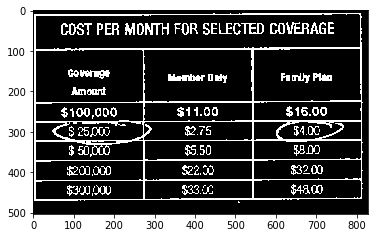

In [22]:
import matplotlib.pyplot as plt
plt.imshow(bw, cmap='gray')
plt.show()


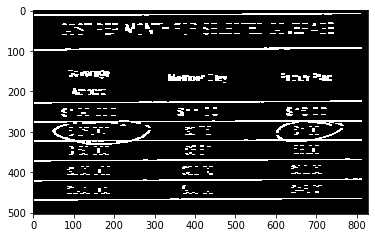

In [23]:
plt.imshow(horizontal, cmap='gray')
plt.show()


In [24]:
h_img, w_img = horizontal.shape
h_img*0.5


251.5

62


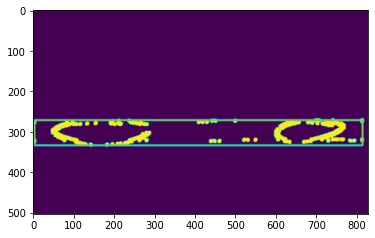

In [25]:
h_img, w_img = horizontal.shape
Threshold1, thresh_im = cv2.threshold(horizontal, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
Threshold2 = 0.5*Threshold1
FilterSize = 5
    
detected_lines = cv2.Canny(horizontal, Threshold1, Threshold2, FilterSize)
kernel = np.ones((5,5), np.uint8)
img_dilate = cv2.dilate(horizontal, kernel, iterations=2)

cnts = cv2.findContours(horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
max_width = 0
max_height = 0
blank_img =horizontal*0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    #if (h >= 0.4*h_img) :
    if (w >=0.4*w_img  and  h>=60) :   
        print(h)
        #print(w)
        cv2.drawContours(blank_img, c, -1, (255, 255, 255), 9)
        cv2.rectangle(blank_img,(x,y),(x+w,y+h),(200,255,155),3)

plt.imshow(blank_img,interpolation='hamming')
plt.show()

In [11]:
import cv2
import numpy as np
#pre_img = cv2.imread('53-10.tif')
pre_img = cv2.imread('TEST.tif')
#pre_img =cv2.imread('test2.png')
print(pre_img.shape) 

inputImageGray = cv2.cvtColor(pre_img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(inputImageGray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
  
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(5, 5))

dilated = cv2.dilate(inputImageGray, kernel)

horizontal = np.copy(bw)
vertical = np.copy(bw)

cols = horizontal.shape[1]

horizontal_size = cols // 30
print(horizontal_size)
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (7,1))
# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)



rows = vertical.shape[0]
verticalsize = rows // 30
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 828))
# Apply morphology operations
vertical = cv2.erode(vertical, verticalStructure)
vertical = cv2.dilate(vertical, verticalStructure)
# Show extracted vertical lines

vertical = cv2.bitwise_not(horizontal)
# Step 1
edges = cv2.adaptiveThreshold(vertical, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                            cv2.THRESH_BINARY, 3, -2)
# show_wait_destroy("edges", edges)
# # Step 2
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel)
# show_wait_destroy("dilate", edges)
# # Step 3
smooth = np.copy(vertical)
# # Step 4
# smooth = cv.blur(smooth, (2, 2))
# # Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
# # Show final result


# cv2.imshow('input', bw)
# cv2.imshow('output', vertical)
# # plt.imshow(inputImageGray)
# # plt.show()
# # plt.imshow(dilated)
# # plt.show()
# cv2.waitKey(0)

(117, 1011, 3)
33


In [12]:
import numpy as np

np.linspace(0, 5-1, 7)

#np.linspace

array([0.        , 0.66666667, 1.33333333, 2.        , 2.66666667,
       3.33333333, 4.        ])

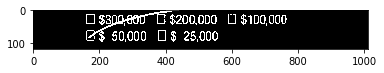

In [13]:
import matplotlib.pyplot as plt
plt.imshow(bw, cmap='gray')
plt.show()


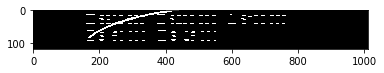

In [14]:
plt.imshow(horizontal, cmap='gray')
plt.show()


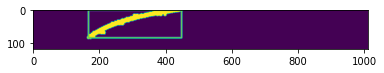

In [15]:
h_img, w_img = horizontal.shape
Threshold1, thresh_im = cv2.threshold(horizontal, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
Threshold2 = 0.5*Threshold1
FilterSize = 5
    
detected_lines = cv2.Canny(horizontal, Threshold1, Threshold2, FilterSize)
kernel = np.ones((5,5), np.uint8)
img_dilate = cv2.dilate(detected_lines, kernel, iterations=1)

cnts = cv2.findContours(horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
max_width = 0
max_height = 0
blank_img =horizontal*0
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if (h >= 0.4*h_img) :
    #if (w >=0.4*w_img and h >= 50 ) :   
        #print(h)
        #print(w)
        cv2.drawContours(blank_img, c, -1, (255, 255, 255), 9)
        cv2.rectangle(blank_img,(x,y),(x+w,y+h),(200,255,155),3)

plt.imshow(blank_img,interpolation='hamming',)
plt.show()

In [18]:
# import os
# os.path.join("C:\\users\fahad\CUNA","Detticting_circles")

# print("Enter into the intial phase of the program")

# import matplotlib.pyplot as plt
# import keras.backend as K
# from keras.callbacks import Callback


# class PINet(Callback):
        
#     def __init__(self, min_lr=1e-5, max_lr=1e-2, steps_per_epoch=None, epochs=None):
#         super().__init__()
        
#         self.min_lr = min_lr
#         self.max_lr = max_lr,
#         self.epochs =  epochs
#         self.trails =  trails
#         self.no_of_hidden_layers = [2,4,6,8,10,12,14,16]
#         #self.learning_rate = [1e-10, 2e-10]
#         self.total_iterations = steps_per_epoch * epochs
#         self.iteration = 0
#         self.history = {}
        
        
#     def clr(self):

#         x = self.iteration / self.total_iterations 
#         return self.min_lr + (self.max_lr-self.min_lr) * x
        
#     def on_train_begin(self, logs=None):

#         logs = logs or {}
#         K.set_value(self.model.optimizer.lr, self.min_lr)
        
#     def on_batch_end(self, epoch, logs=None):
#         logs = logs or {}
#         self.iteration += 1

#         self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
#         self.history.setdefault('iterations', []).append(self.iteration)

#         for k, v in logs.items():
#             self.history.setdefault(k, []).append(v)
            
#         K.set_value(self.model.optimizer.lr, self.clr())
 
#     def plot_lr(self):
#         plt.plot(self.history['iterations'], self.history['lr'])
#         plt.yscale('log')
#         plt.xlabel('Iteration')
#         plt.ylabel('Learning rate')
#         plt.show()
        
#     def plot_loss(self):
#         plt.plot(self.history['lr'], self.history['loss'])
#         plt.xscale('log')
#         plt.xlabel('Learning rate')
#         plt.ylabel('Loss')
#         plt.show()    
        
        

In [19]:
min_lr=1e-5
max_lr=1e-2
iteration =10
epochs =10
steps_per_epoch =100
total_iterations = steps_per_epoch * epochs
x =iteration / total_iterations 
lr= min_lr + (max_lr-min_lr) * x
       

In [20]:
lr

0.0001099